<a href="https://colab.research.google.com/github/miller00315/ia_studies/blob/main/time_series_forecasting_with_tensor_flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Forecast](https://otexts.com/fpp3/)

[Nbeats](https://arxiv.org/abs/1905.10437)

[coinDesk](https://coindesk.com/price/bitcoin)

# Time series forecasting funcamentals with TensorFlow + ilestone Project 3: Bit Predict 💰 📈

Let's write some TensorFlow code to predict the price of Bitcoin based on the historical price of bitcoin.

📛 **Note:** This is not financial advice.


## Get the data

We're going to be using the historical price data of Bitcoin to try and predict the future price of Bitcoin.

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2024-06-18 22:39:53--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.03s   

2024-06-18 22:39:54 (5.48 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



## Import time series with pandas

In [2]:
import pandas as pd
import numpy as np

# Let's read in our Bitcoin data and parse the dates

df = pd.read_csv("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates=["Date"],
                 index_col=["Date"])

df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [3]:
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [5]:
# How many samples do we have
len(df)

2787

We've collected the historical price of Bitcoin for the past ~8 yers but there's 2787 samples.

Typically deep learning model usually like lots and lots of samples (where lots and lots can thousands to ten of thousand of millions).

A smaller number of samples is something you'll often run into with time series data problems.

> 🔑 **Note:** the **seasonality** of a time series dataset is referred as teh number of samples per year. So for our Bitcoin, it has a seasonality of daily or value of 365 beause wwe collect one sample per day meaning we'll get 365 samples per year.

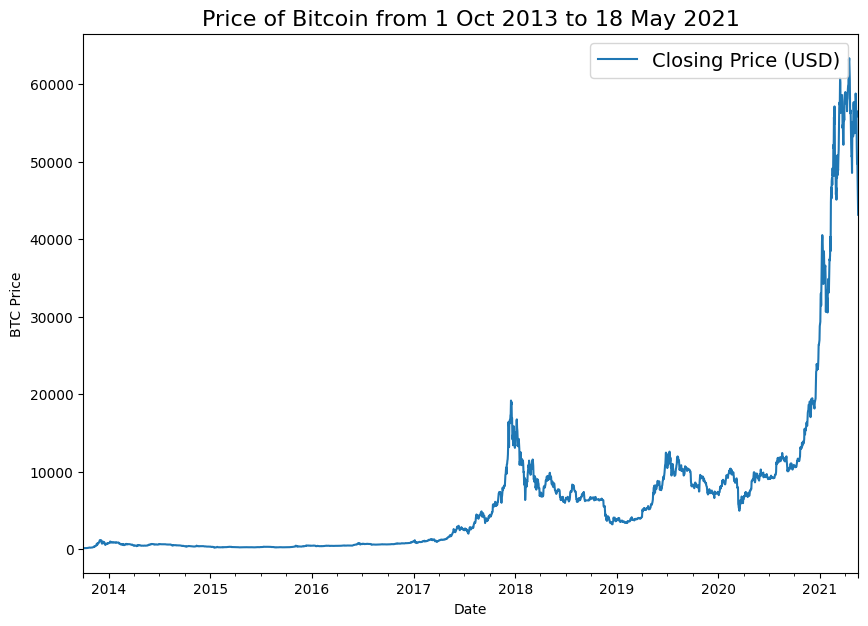

In [6]:
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt

%matplotlib inline

import pandas as pd

df.plot(y="Closing Price (USD)", figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.legend(fontsize=14);
plt.show()

In [7]:
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


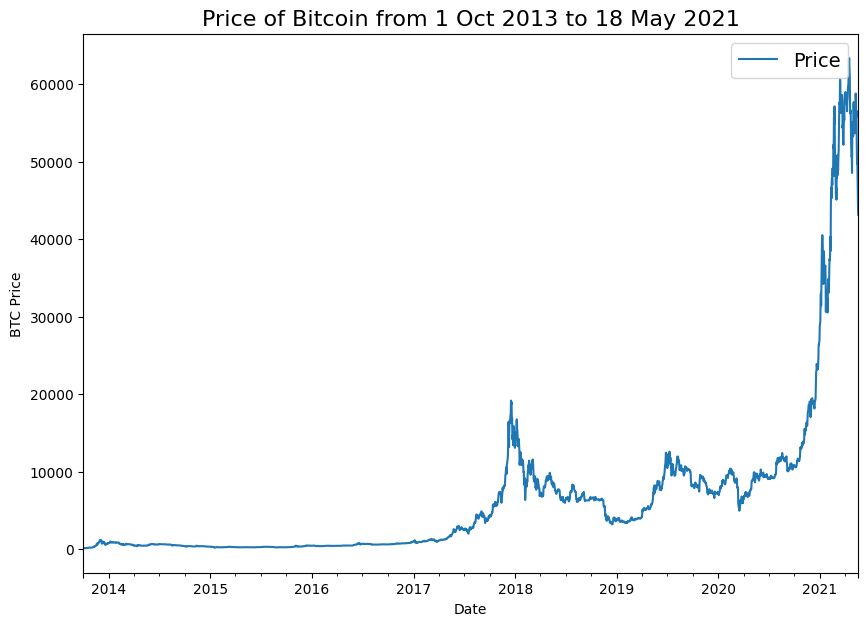

In [8]:
import matplotlib.pyplot as plt

bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.legend(fontsize=14);
plt.show()

## Import time series dta with Python's CSV module

In [9]:
# Importing and formatting historiacal Bitcoin dta with Python

import csv
from datetime import datetime

timesteps = []
btc_price = []

with open("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
    csvreader = csv.reader(f)
    next(csvreader) # skip first line (this gets rid of the column titles)

    for line in csvreader:
        timesteps.append(datetime.strptime(line[1], "%Y-%m-%d"))
        btc_price.append(float(line[2].replace(",", "")))

timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

In [10]:
print(f"Number of timesteps: {len(timesteps)}")
print(f"First timestep: {timesteps[0]}")
print(f"Last timestep: {timesteps[-1]}")
print(f"Average price: {sum(btc_price)/len(btc_price)}")
print(f"Highest price: {max(btc_price)}")
print(f"Lowest price: {min(btc_price)}")
print(f"Median price: {sorted(btc_price)[len(btc_price)//2]}")
print(f"Standard deviation: {sum([(i - sum(btc_price)/len(btc_price))**2 for i in btc_price])/(len(btc_price)-1)}")
print(f"Variance: {sum([(i - sum(btc_price)/len(btc_price))**2 for i in btc_price])/(len(btc_price))}")
print(f"Coefficient of variation: {sum([(i - sum(btc_price)/len(btc_price))**2 for i in btc_price])/(len(btc_price)-1)/sum(btc_price)/len(btc_price)}")

Number of timesteps: 2787
First timestep: 2013-10-01 00:00:00
Last timestep: 2021-05-18 00:00:00
Average price: 6529.845141273066
Highest price: 63346.7890351052
Lowest price: 108.58483
Median price: 2780.1825
Standard deviation: 118545221.97186378
Variance: 118502686.90836473
Coefficient of variation: 0.0023372611210413174


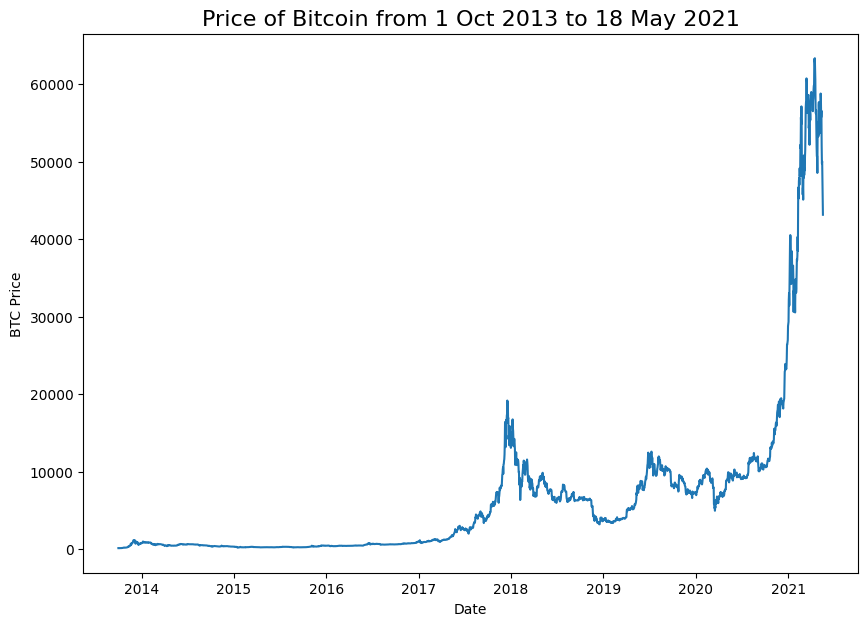

In [11]:
# Plot from cvs
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.plot(timesteps, btc_price)
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.show()


## Format data part 1: Create train and test sets of our time series data

### Creating train and test sets with time series (the wrong way)

In [12]:
# get bitcoin data array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [13]:
# Wrong way to make train/test sets for time series data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps, # dates
                                                    prices, # BTC prices
                                                    test_size=0.2,
                                                    random_state=42,
                                                    shuffle=True)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

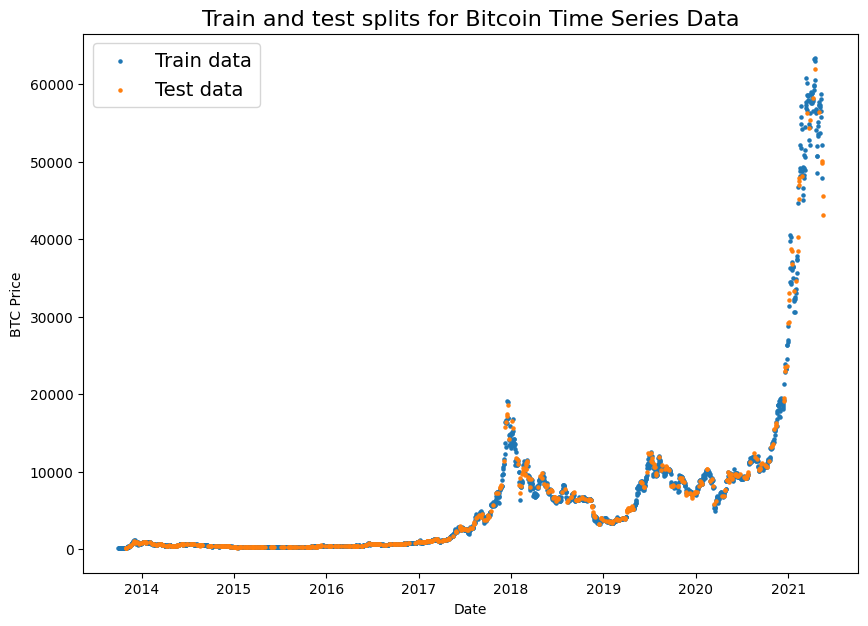

In [14]:
# Let's plot wrong train and test splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.title("Train and test splits for Bitcoin Time Series Data", fontsize=16)
plt.legend(fontsize=14)
plt.show()

### Create train and test sets right way

In [15]:
# Create train and test splits the right way for time series

split_size = int(0.8 * len(prices)) # 80% train, 20% test

# Create train data split
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data split
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

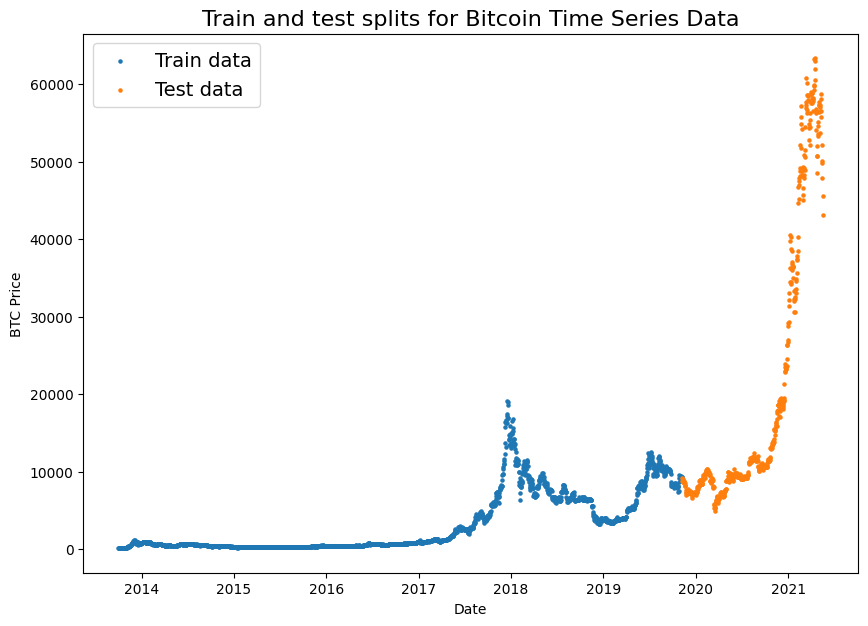

In [16]:
# Let's plot wrong train and test splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.title("Train and test splits for Bitcoin Time Series Data", fontsize=16)
plt.legend(fontsize=14)
plt.show()

### Creating a ploting fnction

Typing ploting code is tedious, let's functionize it

In [17]:
# Create a fucntion to plot timeseries dta

def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
    """
    Plot timesteps (a series of points in time) against values (a series of values across timesteps).

    Parameters
    ----------
    timesteps : array of timesteps
    values : array of values across time
    format : style of plot, default "."
    start : where to start the plot (setting a value will index from start of timesteps & values)
    end : where to end the plot (setting a value will index from end of timesteps & values
    label : label to show on plot of values
    """
    # Plot the series
    plt.plot(timesteps[start:end], values[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("BTC Price")
    plt.xticks(rotation=45)
    if label:
        plt.legend(fontsize=14) # make label bigger
    plt.grid(True)

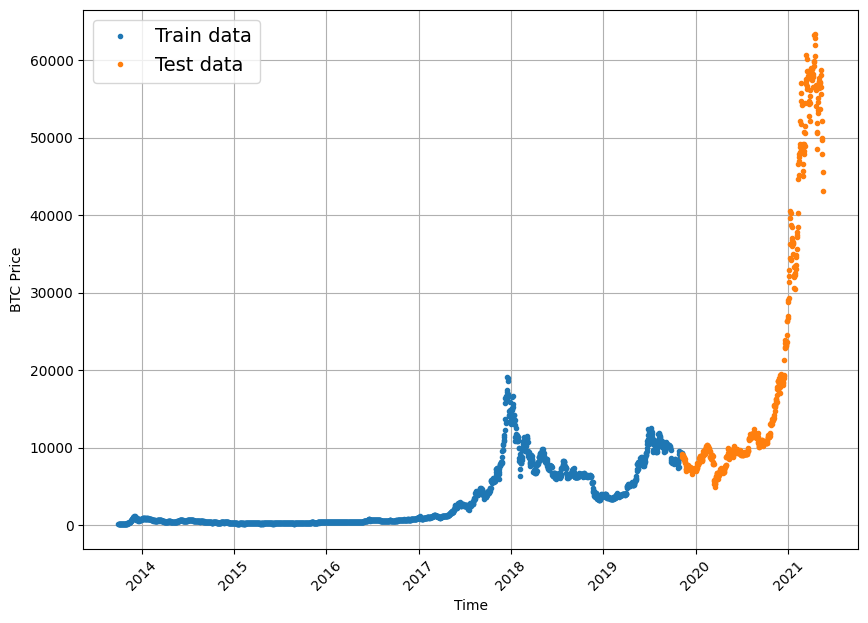

In [18]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

## Modelling experiments

We've got som Bitcoin histrical data, let's run a series of mdoelling experiments and see which model performs best.

Terms to be familiar with:

* **Horizon** = number of timesteps into the future we're going to predict
* **Window size** = number of timestps we're going ot us to predict **horizon**

Modelling experiments we're running:

* 0	Naïve model (baseline)
* 1	Dense model, horizon = 1, window = 7
* 2	Same as 1, horizon = 1, window = 30
* 3	Same as 1, horizon = 7, window = 30
* 4	Conv1D
* 5	LSTM
* 6	Same as 1 (but with multivariate data)
* 7	N-BEATs Algorithm
* 8	Ensemble (multiple models optimized on different loss functions)
* 9	Future prediction model (model to predict future values)
* 10	Same as 1 (but with turkey 🦃 data introduced)


## Model 0: Naive forecast (baseline)

The formula look like this:

$$\hat{y}/_{t}=y_{t-1}$$

In English:

> The prediciton at timestep t (y-hat) is equal to the value at timestep t-1 (previous timestep) - this is for horizon of 1.

In [19]:
# Create a naive forecast
naive_forecast = y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

In [20]:
y_test[-10:]

array([58788.20967893, 58102.19142623, 55715.54665129, 56573.5554719 ,
       52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
       45604.61575361, 43144.47129086])

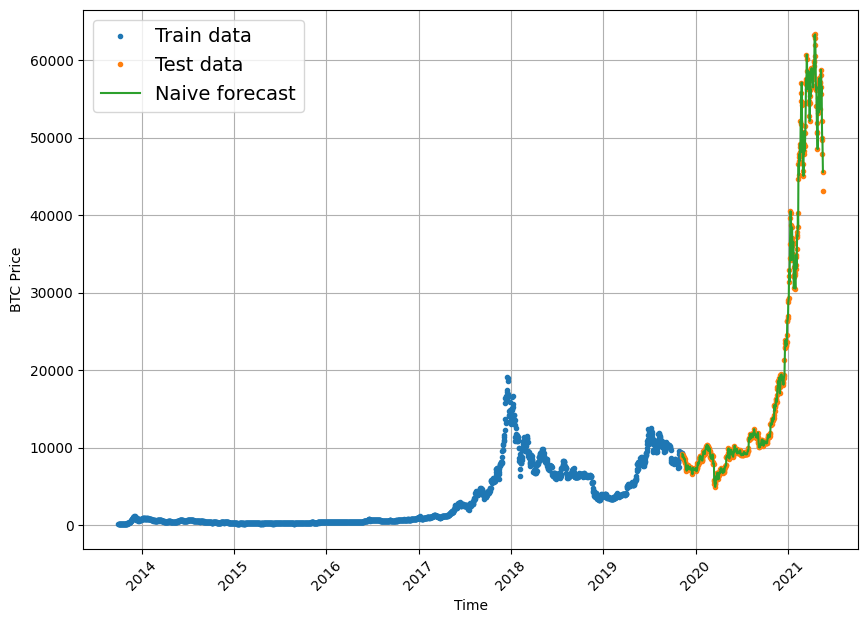

In [23]:
# Plot naive forecasta

plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast")

## Evaluating a timesreies model

Let's look into some evaluatyion metrics for time series oforecasting.

What are we doing?

We're predictiing a number , so that mean we have a form of regresion problem.

Because we're working on a regression problem, we'll need some regresion like metrics.

A few common regresion metrics (which can also be used for time serties forecasting):

* MAE - mean absolute error - on average, how wrong is each of my models prediction
* MSE - mean squared error - on average, how wrong is each of my models prediction
* RMSE - root mean squared error - on average, how wrong is each of my models prediction
* MAPE - mean absolute percentage error - on average, how wrong is each of my models prediction
* MASE - mean absolute scaled error - on average, how much worse is each of my models prediction

For all of the above metrics, **lowe is better**, for example, a MAE of 0 that is better than a MAE of 100.

The main thing we're evaluating here is: how do our model's forecasts (y_pred) compare against the actual values (y_true our ground true values)?

In [24]:
import tensorflow as tf

In [26]:
# MASE implementation
def main_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).

  MASE
  -----
  Measures accuracy of model relative to the mean of the absolute value of the
  residuals.
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # Our seasonality is 1 day (hence the shift of 1)
  return mae / mae_naive_no_season

In [28]:
main_absolute_scaled_error(y_true=y_test[1:], y_pred=naive_forecast).numpy()

0.9995699939182624

In [29]:
# Create a function to take in model predictions and trth values and return evaluation metrics

def evaluate_preds(y_true, y_pred):
  # Make sure float32 datatype (for metric calculations)
  """
  Performs evaluation
  computes MAE, MSE, RMSE, MAPE, MASE
  """
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various evaluation metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = main_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [31]:
evaluate_preds(y_true=y_test[1:], y_pred=naive_forecast)

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

In [33]:
tf.reduce_mean(y_test)

<tf.Tensor: shape=(), dtype=float64, numpy=20056.632963737226>

In [32]:
tf.reduce_mean(tf.abs(y_test[1:] - naive_forecast))

<tf.Tensor: shape=(), dtype=float64, numpy=567.9802273457541>

## Other models you can use for baselines and for actual forecast

In the notebook, we're going focused on TensorFlow and deep learning models.

However there are plenty of other styles of time series forecasting models you may want to experiment with.

https://dev.mrdbourke.com/tensorflow-deep-learning/10_forecasting_models/#other-kinds-of-time-series-forecasting-model-which-can-be-used-for-baselines-and-actual-forecasts